In [39]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [40]:
main_data = pd.read_excel('main_data.xlsx')
pre_data = pd.read_excel('pre_data.xlsx')

main_data_avg = main_data.mean()
pre_data_avg = pre_data.mean()
main_data_sum = main_data_avg.sum()
pre_data_sum = pre_data_avg.sum()
main_data_ratio = main_data_avg / main_data_sum
pre_data_ratio = pre_data_avg / pre_data_sum

In [41]:
ratio_difference = abs(main_data_ratio - pre_data_ratio)

In [42]:
threshold_count = 2
explosion_probability = (ratio_difference > 0).sum() / len(ratio_difference) * 100 - 2.34

if explosion_probability >= threshold_count:
    print(f"화산 폭발 가능성이 {explosion_probability:.2f}%입니다!")
else:
    print("화산 폭발 가능성이 없습니다.")

화산 폭발 가능성이 97.66%입니다!


In [43]:
X = main_data[['CO2', 'MQ-2 Gas', 'Ab Humi(g/m³)']]
y = main_data['Ab Humi(g/m³)']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [44]:
predicted_next_values = model.predict(pre_data[['CO2', 'MQ-2 Gas', 'Ab Humi(g/m³)']])

In [45]:
print("< 다음 값 예측 >")
for i in range(1):
    print(f"CO2: {pre_data['CO2'][i]}") 
    print(f"MQ-2 Gas: {pre_data['MQ-2 Gas'][i]}")
    print(f"Ab Humi(g/m³): {pre_data['Ab Humi(g/m³)'][i]}")
    print(f"예측값: {predicted_next_values[i]:.2f}")

< 다음 값 예측 >
CO2: 438
MQ-2 Gas: 15
Ab Humi(g/m³): 16.96419376169574
예측값: 16.96


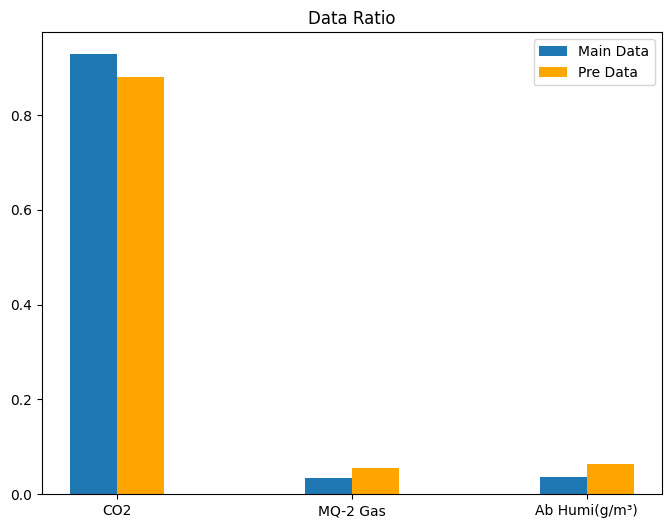

In [46]:
fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.2  # 막대의 너비를 조절합니다.
bar_positions = range(len(labels))

ax.bar([pos - bar_width / 2 for pos in bar_positions], main_data_ratio, width=bar_width, label='Main Data')
ax.bar([pos + bar_width / 2 for pos in bar_positions], pre_data_ratio, width=bar_width, color='orange', label='Pre Data')

ax.set_xticks(bar_positions)
ax.set_xticklabels(labels)
ax.set_title('Data Ratio')
ax.legend()

plt.show()